
# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> 
The TMDb Dataset contains information about 10000 plus movies collected from "The Movie Database". This is a csv dataset that contains 21 columns and 10866 rows

This TMDb dataset contains the following columns:
1. id - A unique identifier for each movie.
2. imdb_id - A unique identifier for each movie on the TMDb dataset.
3. popularity - A numeric representation of the movie popularity.
4. budget - The budget in which the movie was made.
5. revenue - The revenue generated per movie.
6. original_title - The title of the movie before released.
7. cast - The name of lead and supporting actors.
8. homepage - A link to the homepage of the movie.
9. director - the director(s) of the movie
10. tagline - Each movies tagline.
11. keywords - The keywords or tags associated to the movie.
12. overview - A brief description of the movie.
13. runtime - The runtime of the movie in minutes.
14. genres - The genre of the movie, Adventure, Drama, etc.
15. production_companies - The production house of the movie.
16. release_date - The date on which it was released.
17. vote_count - The number of votes per movie
18. vote_average - average ratings the movie recieved.
19. released_year - The year each movies was released
20. budget_adj - shows the full budget per movie in dollars.
21. revenue_adj - shows the full revenue per movie in dollars.



### Question(s) for Analysis

1. Are high budget movies more popular?
2. Which company produced the highest movies?



In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
pd.set_option('display.max_columns', None)

df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08



### Data Cleaning

 

In [5]:
# get number of columns and rows of the TMDb Dataset
df_tmdb.shape

(10866, 21)

In [6]:
df_tmdb.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [7]:
# drop columns that will not be helpful to my analysis
df_tmdb.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df_tmdb.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [8]:
# get information about the datasets
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [9]:
# get the number of cells in each columns that has null values
df_tmdb.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [10]:
# replace cells with null values with not inputted
df_tmdb['cast'].fillna('Cast not inputted', inplace=True)
df_tmdb['director'].fillna('Director not inputted', inplace=True)
df_tmdb['genres'].fillna('Genres not inputted', inplace=True)
df_tmdb['production_companies'].fillna('Production Companies not inputted', inplace=True)

In [11]:
df_tmdb.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [12]:
# get the number of rows that contains duplicate cells
df_tmdb.duplicated().sum()

1

In [13]:
# remove duplicate row
df_tmdb.drop_duplicates(inplace=True)
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [14]:
# convert datatype of release_date to an appropriate datatype '.todatetime()'
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 1.2+ MB


In [15]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [51]:
df_tmdb['production_companies']

0        Universal Studios|Amblin Entertainment|Legenda...
1        Village Roadshow Pictures|Kennedy Miller Produ...
2        Summit Entertainment|Mandeville Films|Red Wago...
3                Lucasfilm|Truenorth Productions|Bad Robot
4        Universal Pictures|Original Film|Media Rights ...
5        Regency Enterprises|Appian Way|CatchPlay|Anony...
6                  Paramount Pictures|Skydance Productions
7        Twentieth Century Fox Film Corporation|Scott F...
8            Universal Pictures|Illumination Entertainment
9        Walt Disney Pictures|Pixar Animation Studios|W...
10                            Columbia Pictures|Danjaq|B24
11       Village Roadshow Pictures|Dune Entertainment|A...
12       DNA Films|Universal Pictures International (UP...
13             Columbia Pictures|Happy Madison Productions
14       Marvel Studios|Prime Focus|Revolution Sun Studios
15       Double Feature Films|The Weinstein Company|Fil...
16       Twentieth Century Fox Film Corporation|M6 Film.

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: Are high budget movies more popular?

In [29]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


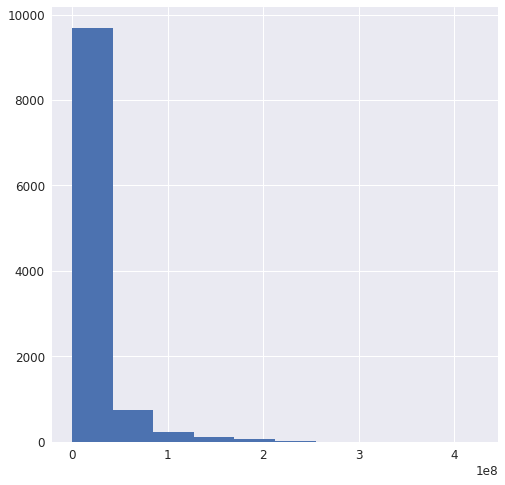

In [49]:
# plot the budget column on an histogram to visualize its distribution
df_tmdb['budget'].hist(figsize=(8,8));

The histogram plot of the budget is right_skew

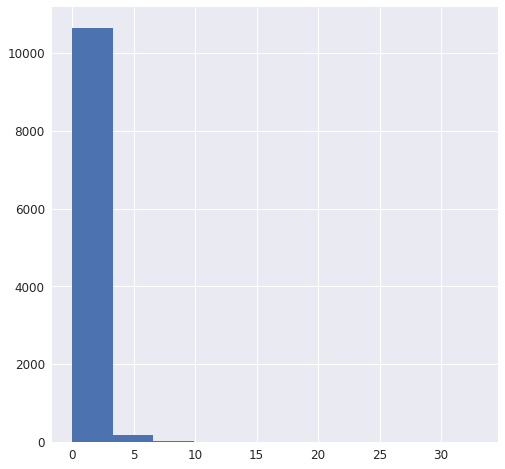

In [50]:
# plot the popularity column on a histogram to visualize its distribution
df_tmdb['popularity'].hist(figsize=(8,8));

0.5454807929309623

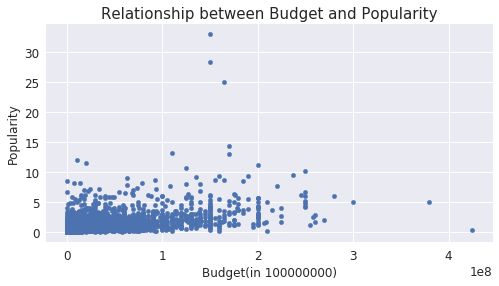

In [51]:
df_tmdb.plot(x='budget', y='popularity', kind='scatter', figsize=(8,4))
plt.title('Relationship between Budget and Popularity', fontsize=15)

plt.xlabel('Budget(in 100000000)', fontsize=12)
plt.ylabel('Popularity', fontsize=12);

df_tmdb['budget'].corr(df_tmdb['popularity'])

The above correlation of 0.545 shows that the relationship is weakly positive and that budget does not majorly influence the popularity of a movie.

### Question 2: Which company produced the most movies?

In [21]:
def disp_bar(x, y, xlabel, ylabel, title):
    """
     A function that plots a barchart of two variables x and y
     
     Args:
        x: Variable on the x-axis
        y: Variable on the y-axis
        xlabel: The label of the x-axis
        ylabel: The label of the y-axis
        title: The title of the bar plot
        
    Returns:
        Implicit
    """
    sns.set(rc={'figure.figsize':(10,6)}, font_scale=1.2)
    ax = sns.barplot(x, y, palette="Set2")
    for item in ax.get_xticklabels():
        item.set_rotation(85)
    ax.set()
    plt.show()
    

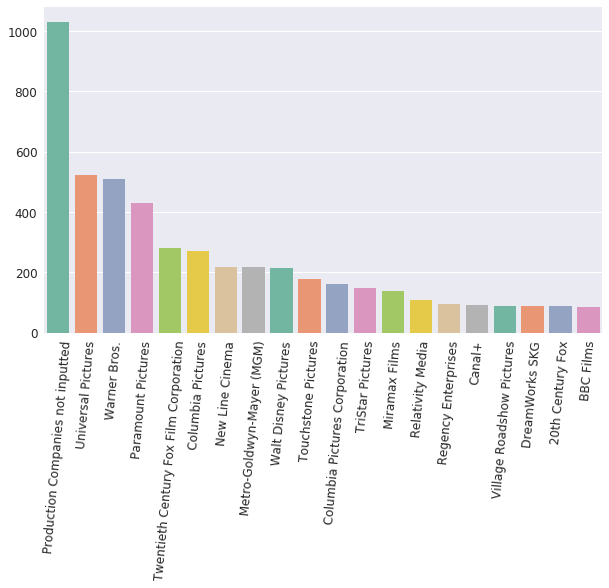

In [24]:
# created an empty dictionary for the producers
producers_dict = dict()

# split the compound string separated by "|"
producers = df_tmdb['production_companies']
producers = producers.str.split('|')
producers = np.array(producers)

#get the count of producers
for producer in producers:
    for ind in producer:
        ind = ind.strip()
        if ind not in producers_dict:
            producers_dict[ind] = 1
        else:
            producers_dict[ind] += 1

#sort the count by descending order 
sorted_producers = sorted(producers_dict.items(), key=operator.itemgetter(1), reverse=True)

x_axis = list()
y_axis = list()

#seperate the count from the producers name: add the number of counts per producers to the list x and the name of the producers to the list y
for i in sorted_producers[0:20]:
    x_axis.append(i[0])
    y_axis.append(i[1])
    
disp_bar(x_axis, y_axis, xlabel='Producer names', ylabel='Number of Movies produced', title = 'The top 20 movies producers in the TMDB dataset')



As can be seen from the barchart above majority of the production companies name was not entered, but from the list that was entered "Universal Pictures" produced the most movies.

<a id='conclusions'></a>
## Conclusions

From my analysis:
Q1: There's a weak positive correlation between movies budget and popularity. This means most times the budget of a movie does not influence its popularity.

Q2: The companies from the known list of producers that produced the most movies is "Universal Pictures"



## Limitations

During my analysis of the production companies, I discovered that majority of the production companies data was not entered, hence did not really give an accurate results of the company that produced the most movies.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])